In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:

# Caminho para o arquivo
file_path = 'data/glass.data'

# Lista com os nomes das colunas, conforme o UCI
columns = [
    'Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type_of_glass'
]

# Carregar o arquivo (sem cabeçalho)
df = pd.read_csv(file_path, header=None, names=columns)

# Remover a coluna 'Id' se não for necessária
df.drop(columns=['Id'], inplace=True)

# Mostrar todas as colunas
pd.set_option('display.max_columns', None)

# Exibir as 10 primeiras linhas
display(df.head(10))


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


In [6]:
print(f"Número de linhas no dataset: {len(df)}")

Número de linhas no dataset: 214


In [7]:
# Frequência absoluta
freq_abs = df["Type_of_glass"].value_counts().sort_index()

# Frequência relativa (%)
freq_rel = df["Type_of_glass"].value_counts(normalize=True).sort_index() * 100

# Exibir
balanceamento = pd.DataFrame({
    "Frequência Absoluta": freq_abs,
    "Frequência Relativa (%)": freq_rel.round(2)
})

print(balanceamento)


               Frequência Absoluta  Frequência Relativa (%)
Type_of_glass                                              
1                               70                    32.71
2                               76                    35.51
3                               17                     7.94
5                               13                     6.07
6                                9                     4.21
7                               29                    13.55


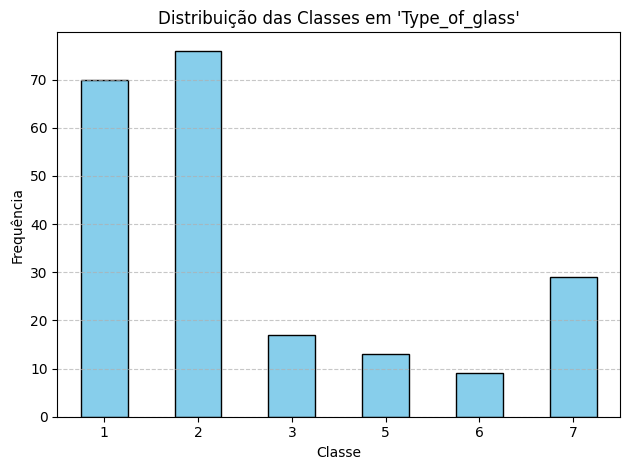

In [8]:
freq_abs.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Distribuição das Classes em 'Type_of_glass'")
plt.xlabel("Classe")
plt.ylabel("Frequência")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [10]:
print(df.isnull().sum()[df.isnull().sum() > 0])

# Verificar valores ausentes representados por '?' em todas as colunas
missing_values = (df == '?').sum()

# Filtrar apenas as colunas que possuem valores ausentes
missing_values = missing_values[missing_values > 0]

# Exibir resultado
print("Valores ausentes (representados por '?') por coluna:")
print(missing_values)


Series([], dtype: int64)
Valores ausentes (representados por '?') por coluna:
Series([], dtype: int64)


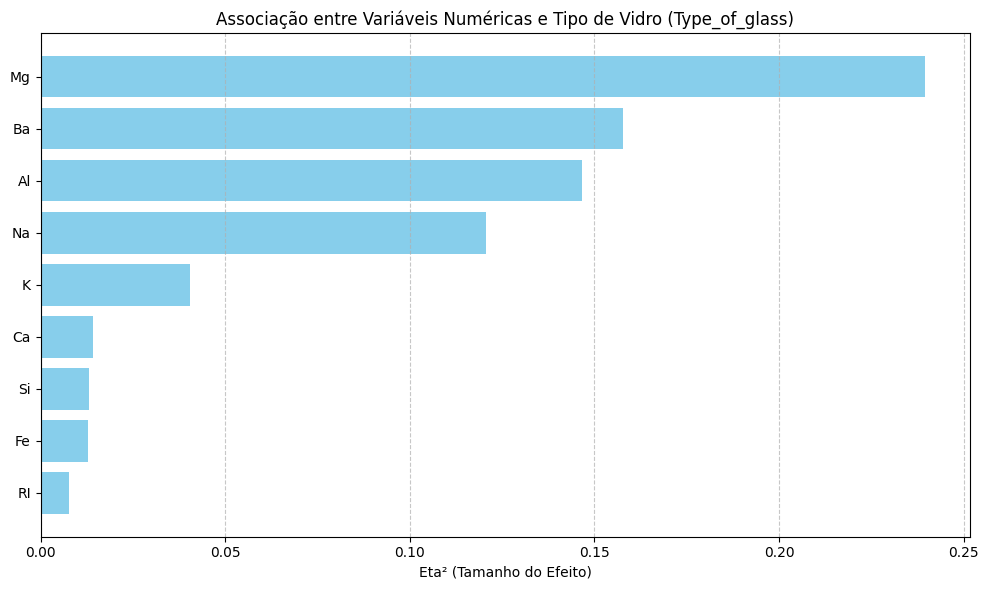

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_classif

# Separar X e y
X = df.drop(columns=['Type_of_glass'])
y = df['Type_of_glass']

# Calcular F e p-valor via ANOVA
f_values, p_values = f_classif(X, y)

# Parâmetros
n = len(y)
k = y.nunique()

# Calcular Eta²
eta_squared = f_values / (f_values + (n - k))

# Montar DataFrame com os resultados
result = pd.DataFrame({
    'Variável': X.columns,
    'F': f_values,
    'p-valor': p_values,
    'Eta²': eta_squared
}).sort_values(by='Eta²', ascending=True)

# Plotar gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(result['Variável'], result['Eta²'], color='skyblue')
plt.xlabel('Eta² (Tamanho do Efeito)')
plt.title('Associação entre Variáveis Numéricas e Tipo de Vidro (Type_of_glass)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Ver se continua classificando como o original, se a imputação melhorou piorou ou continua igual.